# Assignment 7: Linear Model Selection and Regularization

Dataset(s) needed:
Kaggle House Prices (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_rows", 101)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
np.random.seed(1)

from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [2]:
import pandas as pd

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h3> Q.1. Drop the Id columns from both train and test as these are not needed for prediction</h3>

In [3]:
#TODO -> DONE
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

<h3> Q.2. Visualize a scatter plot of 'GrLivArea' in the x-axis and 'SalePrice' in the y-axis. Can you spot any outliers?
</h3>

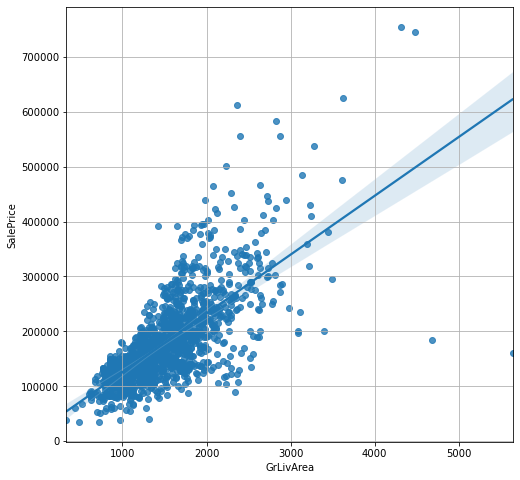

In [4]:
import matplotlib.pyplot as plt

#TODO -> DONE
fig,ax = plt.subplots(figsize=(8,8))
sns.set_theme(color_codes=True)
ax = sns.regplot(x='GrLivArea', y='SalePrice',data=train)
ax.grid(True)

<h3> Q.3. Remove outliers in the data for all GrLivArea greater than 4000 then check the scatter plot again</h3>

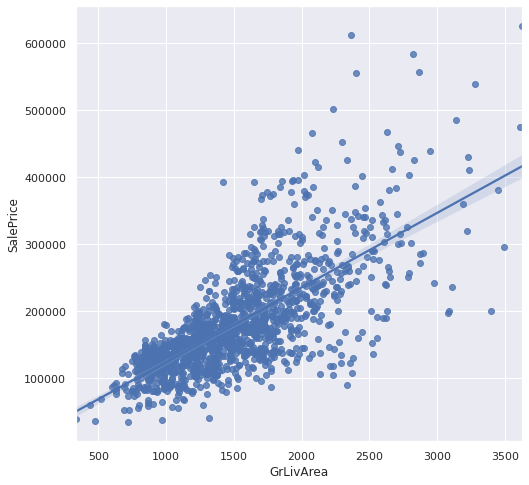

In [5]:
# Remove outliers for train['GrLivArea']>4000
#TODO -> DONE
train = train[train['GrLivArea']<=4000]


#TODO: Scatter plot -> DONE
fig,ax = plt.subplots(figsize=(8,8))
sns.set_theme(color_codes=True)
ax = sns.regplot(x='GrLivArea',y='SalePrice', data=train)
ax.grid(True)

<h3> Q.4.0 Convert categorical variable into dummy variables using pandas get_dummies API</h3>


In [6]:
#TODO -> DONE
len(train.columns)
cols = train.select_dtypes(include=['object']).columns
for col in cols:
    df = pd.get_dummies(train[col])
    train = pd.concat([train,df],axis=1)
    train.drop(col,axis=1,inplace=True)
train.dtypes

80

MSSubClass       int64
LotFrontage    float64
LotArea          int64
OverallQual      int64
OverallCond      int64
                ...   
AdjLand          uint8
Alloca           uint8
Family           uint8
Normal           uint8
Partial          uint8
Length: 288, dtype: object

<h3> Q.4.1 Impute missing data by the mean of each column.</h3>

In [7]:
#TODO -> DONE
for col in train.columns:
    m = train[col].mean()
    train[col] = train[col].fillna(m)

<h3> Q.4.2 Generate train test split 70/30</h3>

In [8]:
from sklearn.model_selection import train_test_split

#TODO -> DONE
y = train['SalePrice']
X = train.drop('SalePrice',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Linear Regression

<h3> Q.5. Fit a linear regression model to this data and compute the RMSE</h3>

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
models = []

#Fit a linear regression model to this data -> DONE
model = LinearRegression().fit(X_train,y_train)
models.append(model)
y_pred = model.predict(X_test)

#Compute the RMSE 
#TODO -> DONE
#print(f'RMSE = {round(mean_squared_error(y_test, y_pred),2)}')
kfold = KFold(n_splits=10, shuffle=True)
RMSE_scorer = make_scorer(mean_squared_error)
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=RMSE_scorer)

scores = pd.DataFrame(
    index=['lin_reg'],
    columns=['RMSE'],
    data = [np.sqrt(results.mean())]
)
round(scores.sort_values('RMSE'),2)

,RMSE
lin_reg,27692.19


## Lasso Regression

<h3> Q.6.0 Fit lasso regression to training data with alpha 20. (Bonus: You could try CV to find the best alpha within a range)</h3>

In [10]:
from sklearn.linear_model import Lasso 
# sklearn.linear_model.Lasso(
#                           alpha=1.0, *, fit_intercept=True, normalize=False, precompute=False, 
#                           copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, 
#                           random_state=None, selection='cyclic'
#)

#TODO: fit a Lasso regression model to this data -> DONE
model = Lasso(alpha=20).fit(X_train,y_train)
models.append(model)
y_pred = model.predict(X_test)

#Compute the RMSE 
#print(f'RMSE = {round(mean_squared_error(y_test, y_pred),2)}')
kfold = KFold(n_splits=10, shuffle=True)
RMSE_scorer = make_scorer(mean_squared_error)
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=RMSE_scorer)

df = pd.DataFrame(
    index=['lasso_alpha=20'],
    columns=['RMSE'],
    data = [np.sqrt(results.mean())]
)
scores = pd.concat([scores,df])
round(scores.sort_values('RMSE'),2)

/home/kegedy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2248007976.9917603, tolerance: 511069509.62941986
  positive)


,RMSE
lasso_alpha=20,23158.04
lin_reg,27692.19


<h3> Q.6.1 How many columns has the model chosen?</h3>

In [11]:
#TODO
coefs = model.coef_
#len(X_train.columns)
print(f'Model chose {len(coefs[coefs!=0])} features')

Model chose 195 features


## Ridge Regression

<h3> Q.7. Perform ridge regression with alpha set to 0.1 and normalize to True. (Bonus: You could try CV to find the best alpha within a range).</h3> 

In [12]:
from sklearn.linear_model import Ridge
# TODO
# sklearn.linear_model.Ridge(
#                            alpha=1.0, *, fit_intercept=True, normalize=False, copy_X=True, 
#                            max_iter=None, tol=0.001, solver='auto', random_state=None
# )
model = Ridge(alpha=0.1,normalize=True).fit(X_train,y_train)
models.append(model)
y_pred = model.predict(X_test)

<h3> Q.8. What is your root mean squared error (RMSE)? Comment on your observation</h3>

In [13]:
# Compute the RMSE 
# TODO -> DONE
# print(f'RMSE = {round(mean_squared_error(y_test, y_pred),2)}')
kfold = KFold(n_splits=10, shuffle=True)
RMSE_scorer = make_scorer(mean_squared_error)
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=RMSE_scorer)

df = pd.DataFrame(
    index=['ridge_normalize_alpha=0.1'],
    columns=['RMSE'],
    data = [np.sqrt(results.mean())]
)
scores = pd.concat([scores,df])
round(scores.sort_values('RMSE'),2)

,RMSE
lasso_alpha=20,23158.04
ridge_normalize_alpha=0.1,23333.71
lin_reg,27692.19


## Elastic Net Regression

<h3> Q.9. Perform elastic net regression with different values of alpha (0.01, 0.1 and 20). Compute the RMSE as well. 


In [14]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import ElasticNet
# sklearn.linear_model.ElasticNet(
#                                 alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, normalize=False, 
#                                 precompute=False, max_iter=1000, copy_X=True, tol=0.0001, 
#                                 warm_start=False, positive=False, random_state=None, selection='cyclic'
# )
alphas = [0.01, 0.1, 20]

# TODO: fit the Elastic net regression model to this data
# TODO: Compute the RMSE
for alpha in alphas:
    model = ElasticNet(alpha=alpha).fit(X_train,y_train)
    y_pred  = model.predict(X_test)
    #print(f'RMSE = {round(mean_squared_error(y_test, y_pred),2)}')
    kfold = KFold(n_splits=10, shuffle=True)
    RMSE_scorer = make_scorer(mean_squared_error)
    results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=RMSE_scorer)

    df = pd.DataFrame(
        index=[f'elasticnet_alpha={alpha}'],
        columns=['RMSE'],
        data = [np.sqrt(results.mean())]
    )
    scores = pd.concat([scores,df])

In [15]:
round(scores.sort_values('RMSE'),2)

,RMSE
elasticnet_alpha=0.01,22772.87
lasso_alpha=20,23158.04
ridge_normalize_alpha=0.1,23333.71
elasticnet_alpha=0.1,23355.97
lin_reg,27692.19
elasticnet_alpha=20,33279.44


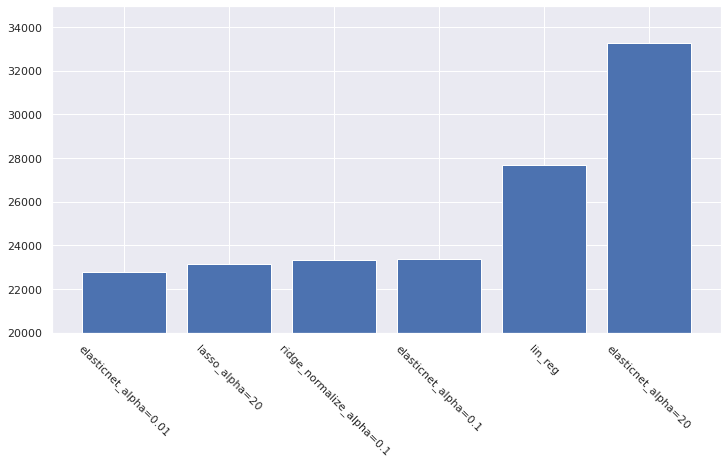

In [16]:
scores = scores.sort_values('RMSE')
fig,ax = plt.subplots(figsize=(12,6))
#ax = sns.barplot(x=scores.index, y=scores.RMSE)
ax.bar(scores.index,scores['RMSE'])
ax.set_ylim(20000)
plt.xticks(rotation=-45)
plt.show();

<h3>Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [17]:
# Enter your summary here